## Predicting Heart Failure 


Heart disease is a leading cause of death among adults.  According to the World Health Organization, nearly 18 million people die each year from heart disease (WHO, 2022).  Heart failure is a common result of heart disease and is identified by a variety of factors influencing the heart’s ability to properly function.  

- age: age of the patient (years)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L) 

These are some of the clinical features to consider when predicting if a patient will die from heart failure.  A data set compiled by the University of California, Irvine showcases these factors in patients experiencing heart failure and the outcome of survival.  

### **Question :**
#### Predicting if a patient will die of heart failure based on the clinical features mentioned above. 

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

## Reading the dataset

In [2]:
heart_failure <- read_csv("https://raw.githubusercontent.com/Parcode19/Group_project/main/heart_failure_clinical_records_dataset.csv")
heart_failure

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


## Cleaning and wrangling the data


### Selecting the columns to be used for the data analysis

We clean the data and only select the columns which are needed for our analysis and answering our question. We also modify the `DEATH_EVENT` column and change the `1` to `Fatal` and `0` to `Not Fatal`. We then use mutate to change the items in the `DEATH_EVENT` column so that it contains factors since our proposal made us realize that we are working on a classifiction problem which requires the target variable to be in the form of factors.

In [54]:
heart_data <- heart_failure |>
    select(age, 
           creatinine_phosphokinase, 
           ejection_fraction, 
           platelets, 
           serum_creatinine, 
           serum_sodium, 
           DEATH_EVENT) 

heart_data$DEATH_EVENT <- ifelse(heart_data$DEATH_EVENT == 0, "Not Fatal", "Fatal") 

heart_data <- heart_data  |>
      mutate(DEATH_EVENT = as_factor(DEATH_EVENT))
heart_data


age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
75,582,20,265000,1.9,130,Fatal
55,7861,38,263358,1.1,136,Fatal
65,146,20,162000,1.3,129,Fatal
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,2060,60,742000,0.8,138,Not Fatal
45,2413,38,140000,1.4,140,Not Fatal
50,196,45,395000,1.6,136,Not Fatal


## Using graphs to compare the relationship between different factors affecting fatality


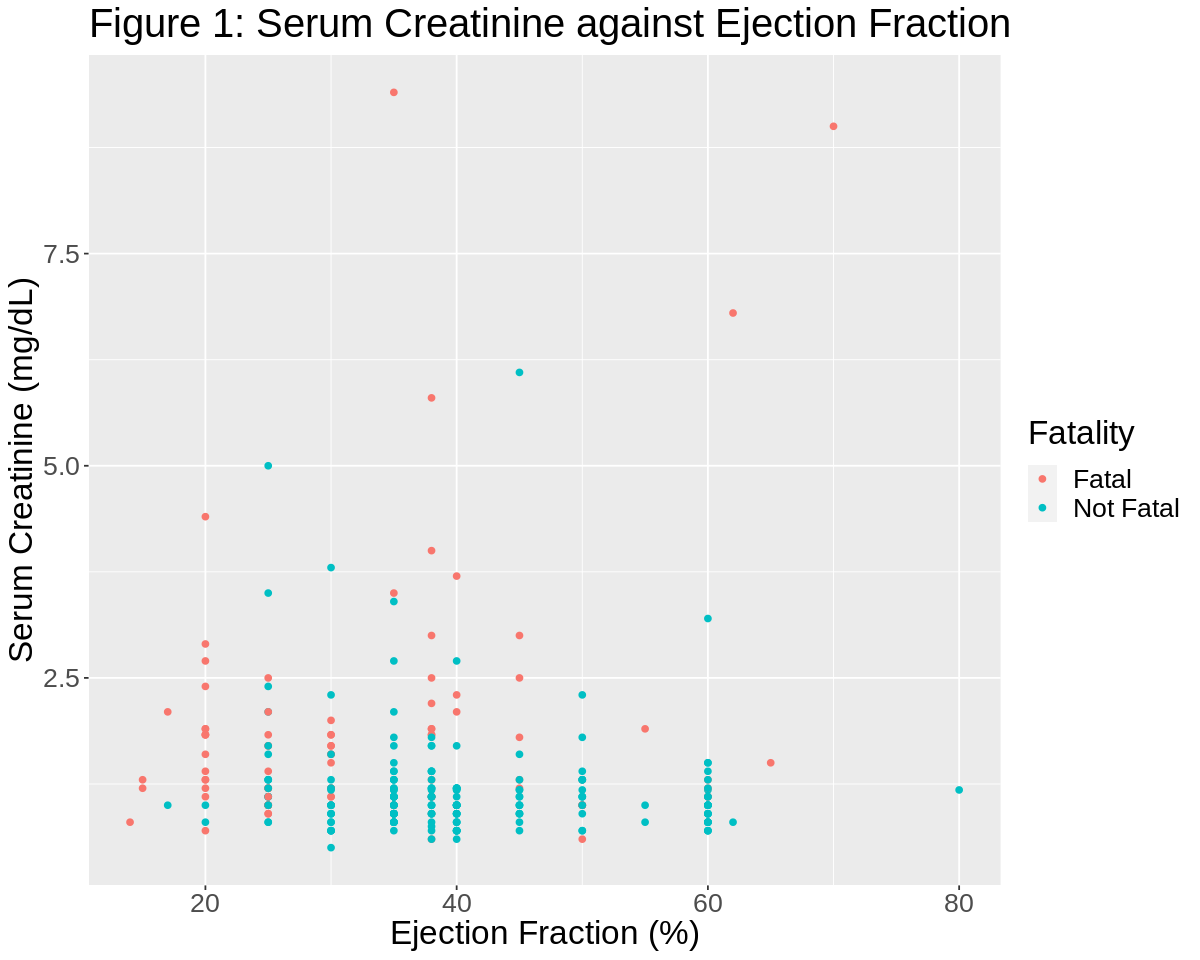

In [59]:
options(repr.plot.height = 8, repr.plot.width = 10)

plot_1 <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = serum_creatinine, col = DEATH_EVENT)) +
        geom_point() +
        labs(x = "Ejection Fraction (%)", y = "Serum Creatinine (mg/dL)", color = "Fatality")+
        theme(text = element_text(size = 20)) +
        ggtitle("Figure 1: Serum Creatinine against Ejection Fraction")
        
plot_1

This graph produces the best relationship compared to the visulizations for all the other factors.

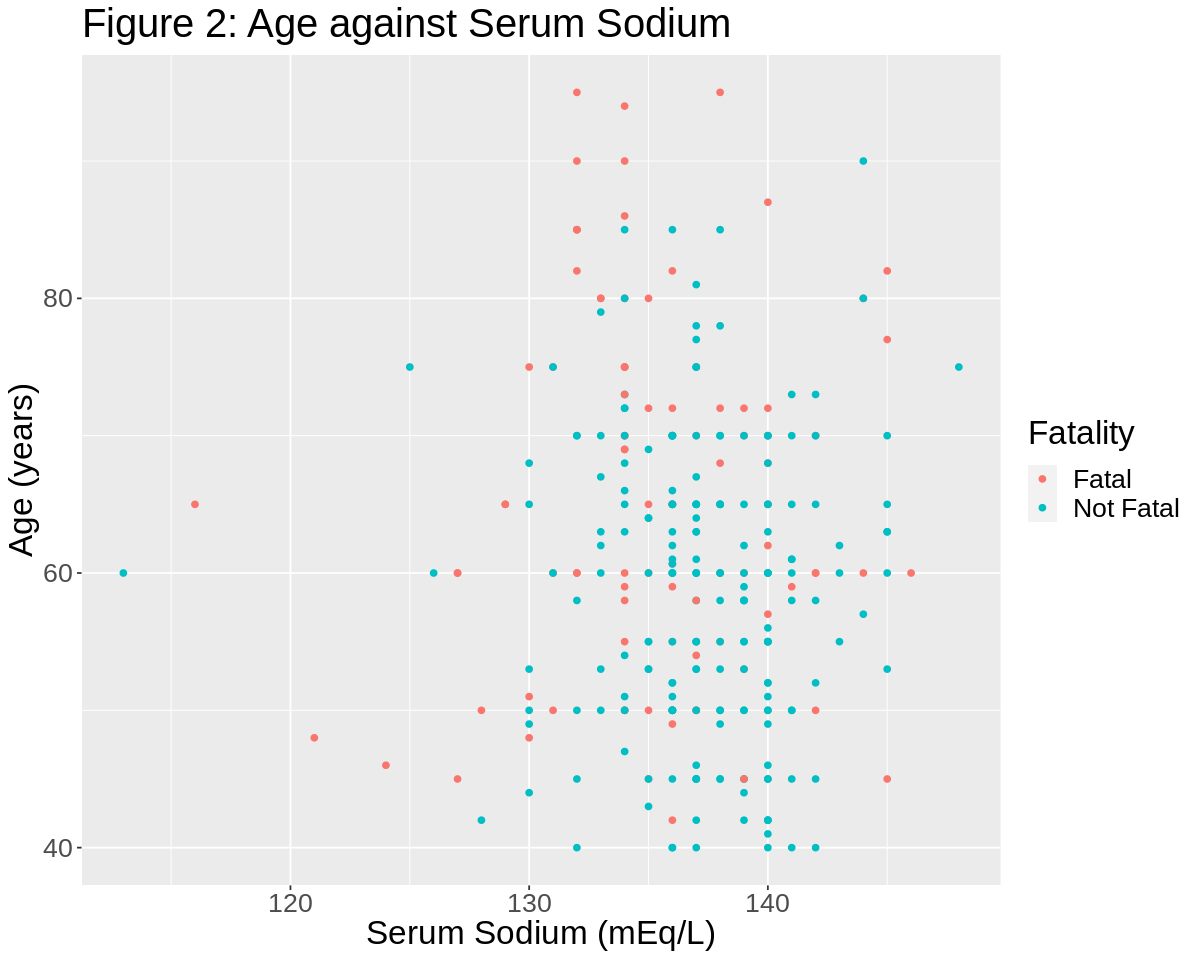

In [57]:
options(repr.plot.height = 8, repr.plot.width = 10)

plot_2 <- heart_data |>
    ggplot(aes(x = serum_sodium, y = age, col = DEATH_EVENT)) +
        geom_point() +
        labs(x = "Serum Sodium (mEq/L)", y = "Age (years)", color = "Fatality")+
        theme(text = element_text(size = 20)) +
        ggtitle("Figure 2: Age against Serum Sodium")

        
plot_2

This graph produced the second best relationship.

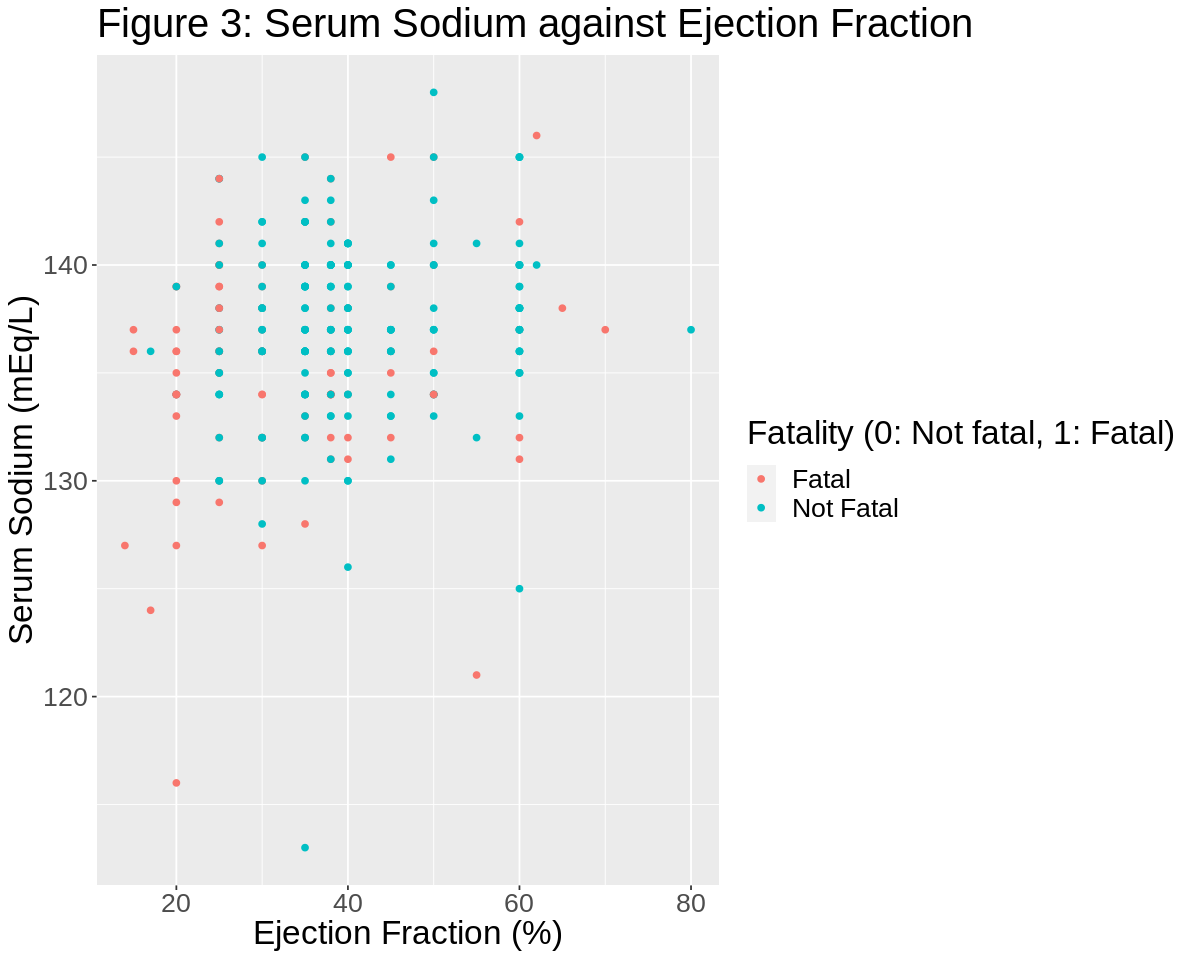

In [58]:
plot_3 <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = serum_sodium, col = DEATH_EVENT)) +
        geom_point() +
        labs(x = "Ejection Fraction (%)", y = "Serum Sodium (mEq/L)", color = "Fatality (0: Not fatal, 1: Fatal)") +
        theme(text = element_text(size = 20)) +
        ggtitle("Figure 3: Serum Sodium against Ejection Fraction")
    
plot_3

This graph shows the least correlation between the factors compared to the graphs above.

## Optimising the number of predictors

The process of finding the best predictor to add to the model can be achieved through Forward Selection (Eforymson 1966; Draper and Smith 1966). 

This method involves:
- Constructing a model with no predictors
- Then sequentially adding one predictor at a time 
- Tuning all candidate models to determine which provides the best accuracy and simplicity.
- This process is repeated until all predictors have been added and the best model has been found. 

To implement this, code must be written that follows the steps outlined above.

In [7]:
names <- colnames(heart_data |> select(-DEATH_EVENT))

In [8]:
set.seed(2020)
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_data, v = 5, strata = DEATH_EVENT)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("DEATH_EVENT", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_data) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,DEATH_EVENT ~ ejection_fraction,0.6853959
2,DEATH_EVENT ~ ejection_fraction+serum_creatinine,0.7690192
3,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium,0.7620719
4,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+age,0.7520135
5,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+age+platelets,0.7521793
6,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+age+platelets+creatinine_phosphokinase,0.7522886


Interesting!  So here the right trade-off of accuracy and number of predictors occurs with 2 variables: DEATH_EVENT ~ `ejection_fraction` + `serum_creatinine`

Let us now only keep these two predictors in our dataset:

In [9]:
heart_new_data <- select (heart_data, ejection_fraction, serum_creatinine, DEATH_EVENT)
heart_new_data

ejection_fraction,serum_creatinine,DEATH_EVENT
<dbl>,<dbl>,<fct>
20,1.9,Fatal
38,1.1,Fatal
20,1.3,Fatal
⋮,⋮,⋮
60,0.8,Not Fatal
38,1.4,Not Fatal
45,1.6,Not Fatal


## Scaling the dataset for equal contributions of each columns

In [10]:
heart_subset <- heart_new_data |>
    mutate(scaled_ejection_fraction = scale(ejection_fraction, center = TRUE),
           scaled_serum_creatinine = scale(serum_creatinine, center = TRUE))
heart_subset

ejection_fraction,serum_creatinine,DEATH_EVENT,scaled_ejection_fraction,scaled_serum_creatinine
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
20,1.9,Fatal,-1.527997920,0.48923681
38,1.1,Fatal,-0.007064906,-0.28407611
20,1.3,Fatal,-1.527997920,-0.09074788
⋮,⋮,⋮,⋮,⋮
60,0.8,Not Fatal,1.851853222,-0.574068459
38,1.4,Not Fatal,-0.007064906,0.005916232
45,1.6,Not Fatal,0.584409044,0.199244462


## Splitting the table into training and testing dataset 

We split the scaled data into a training set and a testing set. 

We will only use the training set when building the classifier. Then, we will use the testing data set to evaluate the accuracy of our classifier. We split the data so that 75% of the data ends up in the training set and 25% in the testing set.

In [11]:
# Set the seed. Don't remove this!
set.seed(2020)

heart_data_split <- initial_split(heart_subset, prop = 0.75, strata = DEATH_EVENT)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

heart_data_train
heart_data_test

ejection_fraction,serum_creatinine,DEATH_EVENT,scaled_ejection_fraction,scaled_serum_creatinine
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
20,1.9,Fatal,-1.527997920,0.48923681
38,1.1,Fatal,-0.007064906,-0.28407611
20,1.3,Fatal,-1.527997920,-0.09074788
⋮,⋮,⋮,⋮,⋮
38,1.2,Not Fatal,-0.007064906,-0.1874120
60,0.8,Not Fatal,1.851853222,-0.5740685
45,1.6,Not Fatal,0.584409044,0.1992445


ejection_fraction,serum_creatinine,DEATH_EVENT,scaled_ejection_fraction,scaled_serum_creatinine
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
65,1.5,Fatal,2.274334615,0.1025803
38,4.0,Fatal,-0.007064906,2.5191832
25,0.9,Fatal,-1.105516528,-0.4774043
⋮,⋮,⋮,⋮,⋮
30,3.8,Not Fatal,-0.683035135,2.325854996
35,1.7,Not Fatal,-0.260553742,0.295908577
38,1.4,Not Fatal,-0.007064906,0.005916232


In [12]:
heart_proportions <- heart_data_train |>
                      group_by(DEATH_EVENT) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_data_train))

heart_proportions

DEATH_EVENT,n,percent
<fct>,<int>,<dbl>
Fatal,72,32.14286
Not Fatal,152,67.85714


We can see that our training dataset has around 32% values which are `Fatal` and 67% values which are `Not Fatal`.

## Evaluating accuracy of the classifier

### Preprocessing the data
We preprocess the data to standardize it and create `heart_recipe` using only the training data set. We set our target variable and also the variables which we want to use as predictors.

In [13]:
set.seed(2020) # DO NOT REMOVE

heart_recipe <- recipe(DEATH_EVENT ~ scaled_ejection_fraction + scaled_serum_creatinine , data = heart_data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Training the classifier

We first create a model specification for the knn classification. We then build the classifier by combining the model specification and the recipe into a workflow and fit the model to our training data.

In [14]:
set.seed(2020) # DO NOT REMOVE

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
     set_engine("kknn") |>
     set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_data_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2678571
Best kernel: rectangular
Best k: 3

### Predicting labels in the test set

We use the classifier which we just created to predict the labels for our test data. The `DEATH_EVENT` column contains the true labels while the `.pred_class` columns contains the predictions.

In [15]:
set.seed(2020) # DO NOT REMOVE

heart_test_predictions <- predict(knn_fit, heart_data_test) |>
  bind_cols(heart_data_test)

heart_test_predictions

.pred_class,ejection_fraction,serum_creatinine,DEATH_EVENT,scaled_ejection_fraction,scaled_serum_creatinine
<fct>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
Not Fatal,65,1.5,Fatal,2.274334615,0.1025803
Fatal,38,4.0,Fatal,-0.007064906,2.5191832
Fatal,25,0.9,Fatal,-1.105516528,-0.4774043
⋮,⋮,⋮,⋮,⋮,⋮
Not Fatal,30,3.8,Not Fatal,-0.683035135,2.325854996
Not Fatal,35,1.7,Not Fatal,-0.260553742,0.295908577
Not Fatal,38,1.4,Not Fatal,-0.007064906,0.005916232


## Compute the accuracy

Finally, we can access the classifiers accuracy using the metrics function.

We can also look at the confusion matrix for the classifier which shows the table of predicted lables and true labels.

In [16]:
set.seed(2020) # DO NOT REMOVE

heart_test_predictions |>
  metrics(truth = DEATH_EVENT, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion <- heart_test_predictions |>
             conf_mat(truth = DEATH_EVENT, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6933333


           Truth
Prediction  Fatal Not Fatal
  Fatal        17        16
  Not Fatal     7        35

We can see that our classifier has the accuracy of around 69.33% and that it predicted 17 labels corectly as Fatal and 35 labels correctly as Not Fatal.

However, we don't know if this is the best k value. Is an accuracy of 69.33% the best we can do? Or can this be improved to get a higher accuracy percentage? 

We are now going to use cross-validation and tune our classifier to find the answers to these questions and look for the best possible k value.

## Tuning the classifier

### Cross validation
We will now perform a 5 fold cross validation where we split our training dataset into c evenly sized chunks and then iteratively use 1 chunk as the validation set for evaluation and the remaining c-1 chunks as the training sets.

Here, we will set c to be 5 and perform a 5 fold cross-validation.

In [17]:
set.seed(2020) # DO NOT REMOVE

heart_vfold <- vfold_cv(heart_data_train, v = 5, strata = DEATH_EVENT)

Then we will create our data analysis workflow.

In [18]:
set.seed(2020) # DO NOT REMOVE

heart_recipe <- recipe(DEATH_EVENT ~ scaled_ejection_fraction + scaled_serum_creatinine , data = heart_data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())


# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = heart_vfold)

knn_fit |> 
  collect_metrics() 

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6697628,5,0.01861383,Preprocessor1_Model1
roc_auc,binary,0.7025883,5,0.02036722,Preprocessor1_Model1


The collect_metrics function is used to aggregate the mean and standard error of the classifier’s validation accuracy across the folds. So if your estimated mean is 0.67 and standard error is 0.018, you can expect the true average accuracy of the classifier to be somewhere roughly between 65.2 % and 68.8 % (although it may fall outside this range).

### Parameter value selection
With cross-validation, we have established a prediction accuracy for our classifier. 

If we had to improve our classifier, we have to change the parameter: number of neighbours, $K$. 
We can use cross-validation to calculate an accuracy for each value of $K$ in a reasonable range, and then pick the value of $K$ that gives us the best accuracy. 

Using `tune()`, each parameter in the model can be adjusted rather than given a specific value. 


In [19]:
set.seed(2020) # DO NOT REMOVE

knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We then create a workflow analysis which combines our `heart_recipe` and our new `knn_tune` model specification. 

We use the `tune_grid` function to fit the model for each value in a range of parameter values.
We then aggregate the mean and standard error by using the `collect_metrics` function.

Finally, we filter for `accuracy` from the `.metric` column of `knn_results`.

In [20]:
set.seed(2020) # DO NOT REMOVE

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

k_best <- accuracies |>
    filter(mean==max(mean))
k_best

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6513834,5,0.02578540,Preprocessor1_Model01
6,accuracy,binary,0.6788538,5,0.01319087,Preprocessor1_Model02
11,accuracy,binary,0.7063241,5,0.03448942,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.6786561,5,0.001936356,Preprocessor1_Model18
91,accuracy,binary,0.6786561,5,0.001936356,Preprocessor1_Model19
96,accuracy,binary,0.6786561,5,0.001936356,Preprocessor1_Model20


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.7328063,5,0.02593492,Preprocessor1_Model05


To visualise the best value of the number of neighboors, we create a line plot using the `accuracies` dataset with `neighbors` on the x-axis and the `mean` on the y-axis. 

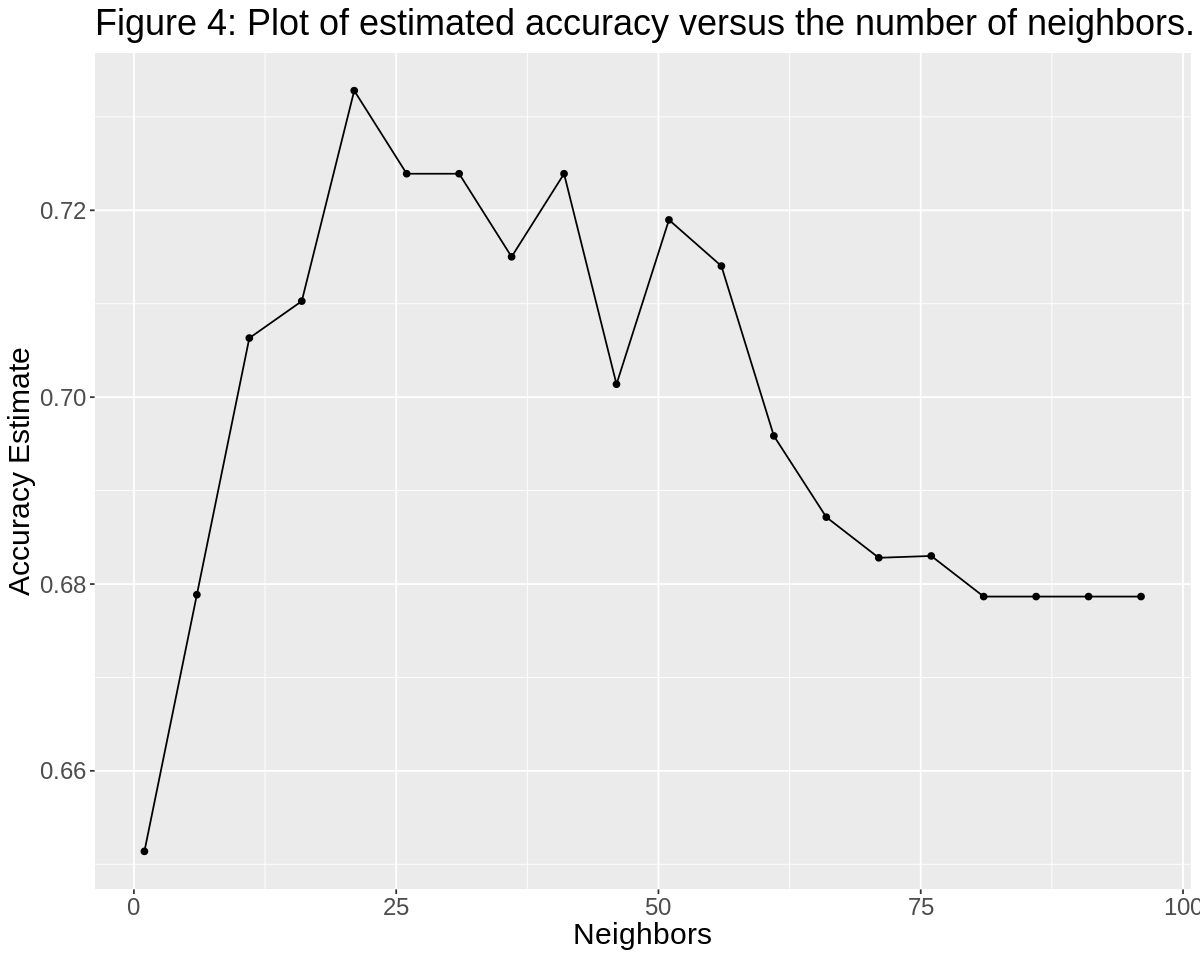

In [21]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 18)) + 
  ggtitle("Figure 4: Plot of estimated accuracy versus the number of neighbors.")

accuracy_vs_k

From the plot above, we can see that $K = 21$ provides the highest accuracy. $K$ values that are smaller or larger than this result in a reduced accuracy estimate.



## Building the classifier using the best K 

In [67]:
set.seed(2020) # DO NOT REMOVE

best_k <- k_best |>
    select(neighbors) |>
    pull()

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
     set_engine("kknn") |>
     set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_data_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2633929
Best kernel: rectangular
Best k: 21

We use the classifier which we just created using the best k value to predict the labels for our test data. The `DEATH_EVENT` column contains the true labels while the `.pred_class` columns contains the predictions.

In [68]:
set.seed(2020) # DO NOT REMOVE

heart_best_predictions <- predict(knn_fit, heart_data_test) |>
  bind_cols(heart_data_test)

heart_best_predictions

.pred_class,ejection_fraction,serum_creatinine,DEATH_EVENT,scaled_ejection_fraction,scaled_serum_creatinine
<fct>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
Not Fatal,65,1.5,Fatal,2.274334615,0.1025803
Fatal,38,4.0,Fatal,-0.007064906,2.5191832
Not Fatal,25,0.9,Fatal,-1.105516528,-0.4774043
⋮,⋮,⋮,⋮,⋮,⋮
Fatal,30,3.8,Not Fatal,-0.683035135,2.325854996
Not Fatal,35,1.7,Not Fatal,-0.260553742,0.295908577
Not Fatal,38,1.4,Not Fatal,-0.007064906,0.005916232


Finally, we can access the classifiers accuracy using the metrics function.

We can also look at the confusion matrix for the classifier which shows the table of predicted lables and true labels.

In [24]:
set.seed(2020) # DO NOT REMOVE

heart_best_predictions |>
  metrics(truth = DEATH_EVENT, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion <- heart_best_predictions |>
             conf_mat(truth = DEATH_EVENT, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.76


           Truth
Prediction  Fatal Not Fatal
  Fatal         9         3
  Not Fatal    15        48

We can see that our classifier has the accuracy of around 76 % and that it predicted 9 labels corectly as Fatal and 48 labels correctly as Not Fatal.

We can see that the accuracy has improved by around 7% from when we used 3 as a random k value.

The accuracy now is 76% because we optimized the number of predictors for the classifier and then tuned the classifier to choose the best k, which resulted in this high accuracy.

## Predicting new observations using the classifier

Let's create some new observations and predict their fatality:

In [72]:
new_observations <- tibble(observations = c("Observation 1", "Observation 2", 
                                            "Observation 3", "Observation 4", 
                                            "Observation 5","Observation 6"), 
                           scaled_ejection_fraction = c(2,0,-1.25,1,-0.8,0), 
                           scaled_serum_creatinine = c(0,1,0,3,1.8,-0.5))
new_observations

observations,scaled_ejection_fraction,scaled_serum_creatinine
<chr>,<dbl>,<dbl>
Observation 1,2.00,0.0
Observation 2,0.00,1.0
Observation 3,-1.25,0.0
Observation 4,1.00,3.0
Observation 5,-0.80,1.8
Observation 6,0.00,-0.5


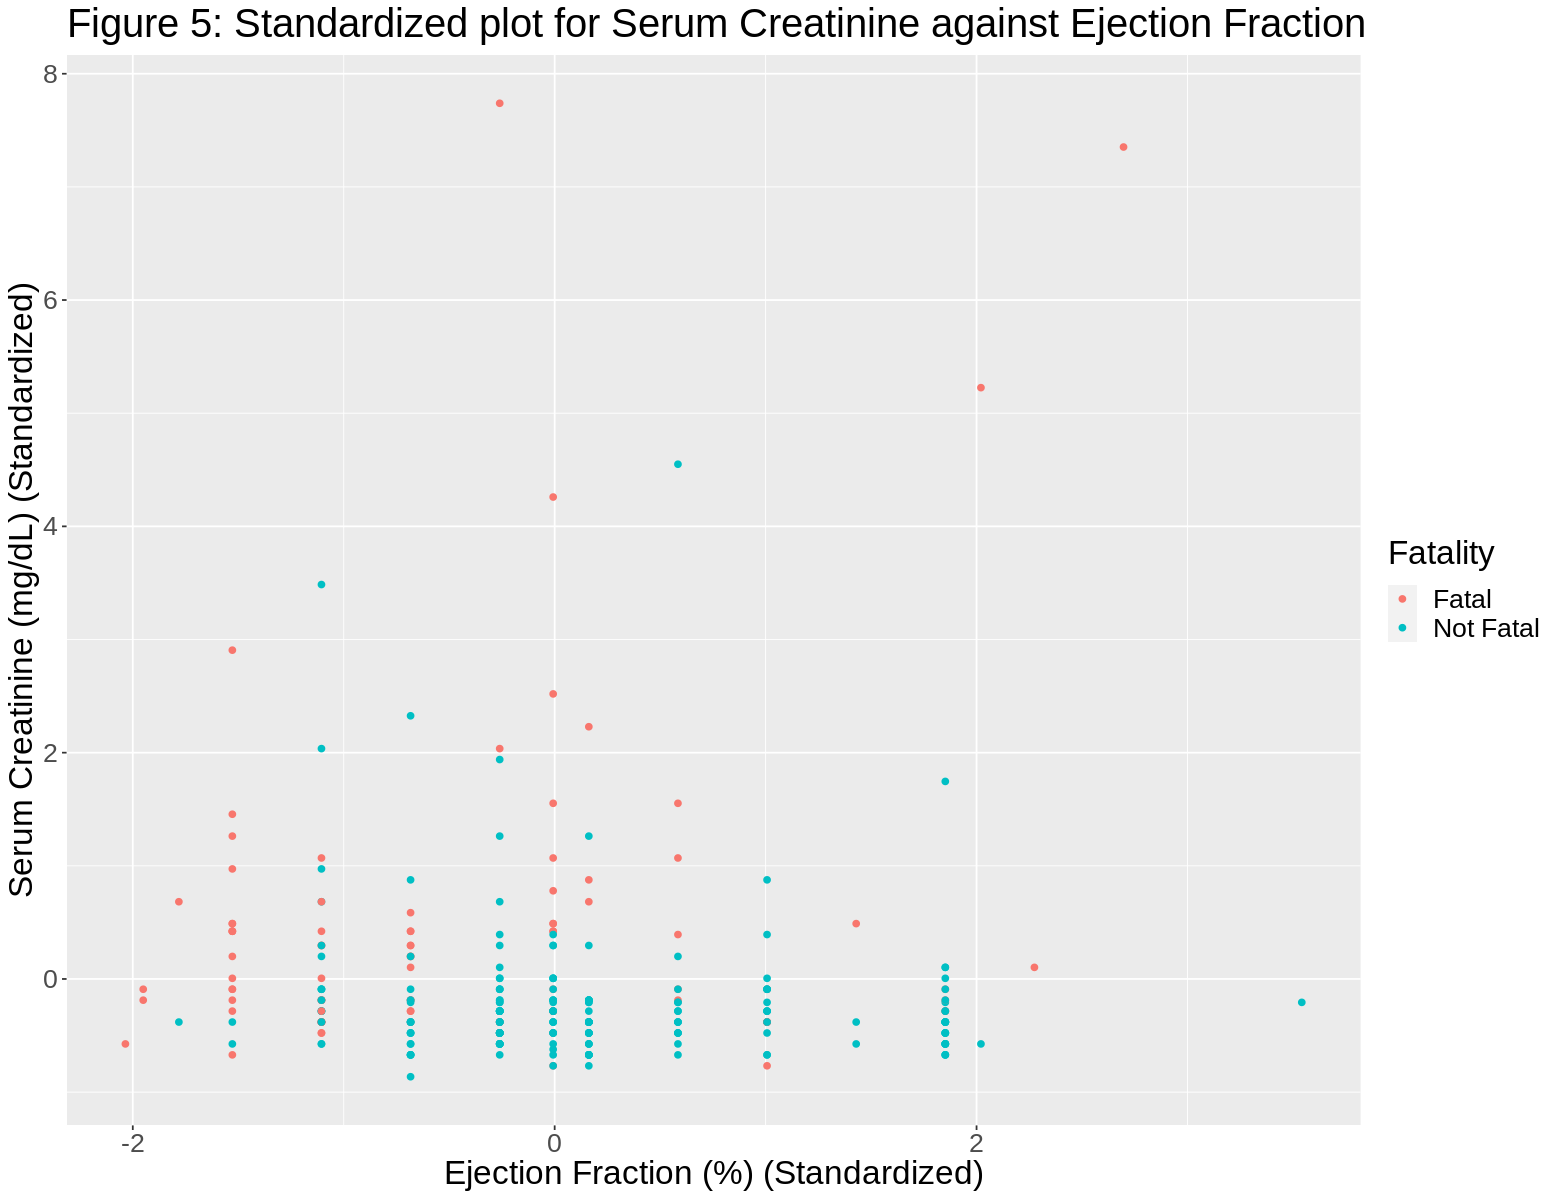

In [71]:
options(repr.plot.height = 10, repr.plot.width = 13)

best_plot <- heart_subset |>
    ggplot(aes(x = scaled_ejection_fraction, y = scaled_serum_creatinine, col = DEATH_EVENT)) +
        geom_point() +
        labs(x = "Ejection Fraction (%) (Standardized)", y = "Serum Creatinine (mg/dL) (Standardized)", color = "Fatality")+
        theme(text = element_text(size = 20)) +
        ggtitle("Figure 5: Standardized plot for Serum Creatinine against Ejection Fraction")
        
best_plot

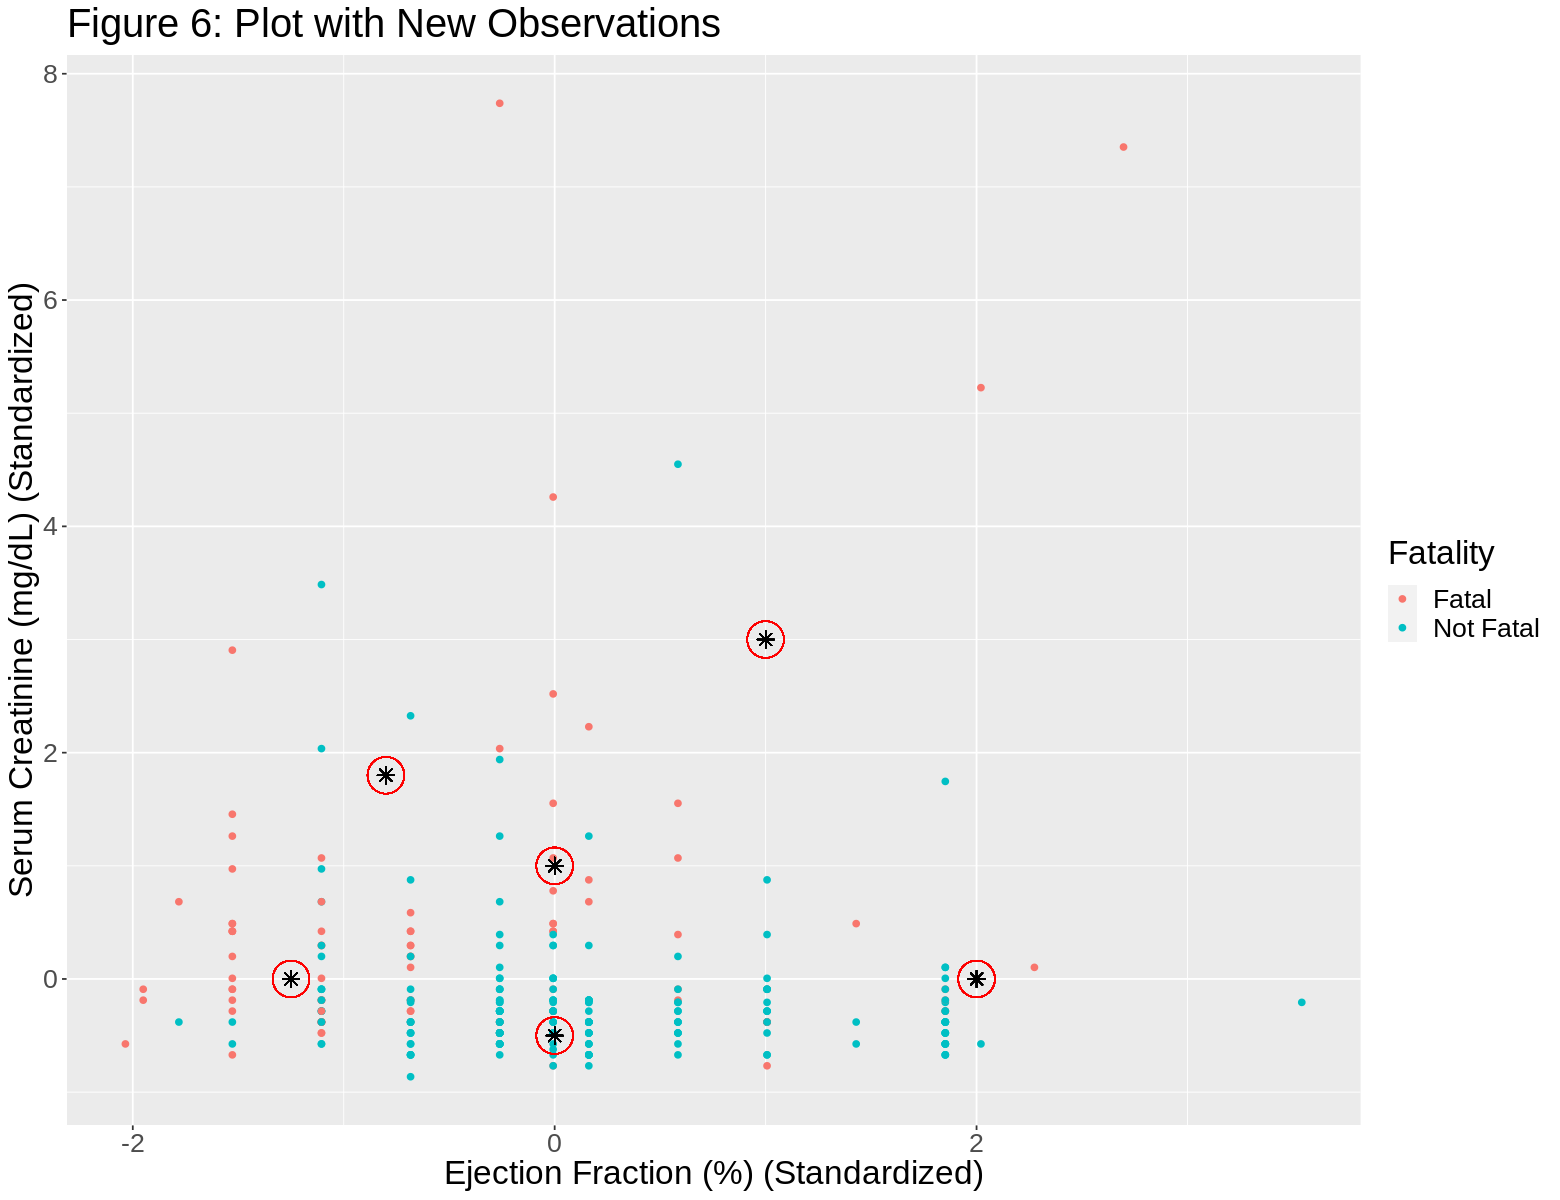

In [73]:
point1 <- c(2, 0)
point2 <- c(0, 1)
point3 <- c(-1.25, 0)
point4 <- c(1, 3)
point5 <- c(-0.8, 1.8)
point6 <- c(0,-0.5)

options(repr.plot.height = 10, repr.plot.width = 13)

newobs_plot <- heart_subset |>
    ggplot(aes(x = scaled_ejection_fraction, y = scaled_serum_creatinine, col = as_factor(DEATH_EVENT))) +
        geom_point() +
        geom_point(aes(x = point1[1], y = point1[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point1[1], y = point1[2]), color = "black", size = 3, shape = 8) +
        geom_point(aes(x = point2[1], y = point2[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point2[1], y = point2[2]), color = "black", size = 3, shape = 8) +
        geom_point(aes(x = point3[1], y = point3[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point3[1], y = point3[2]), color = "black", size = 3, shape = 8) +
        geom_point(aes(x = point4[1], y = point4[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point4[1], y = point4[2]), color = "black", size = 3, shape = 8) +
        geom_point(aes(x = point5[1], y = point5[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point5[1], y = point5[2]), color = "black", size = 3, shape = 8) +
        geom_point(aes(x = point6[1], y = point6[2]), color = "red", size = 10, shape = 21) +
        geom_point(aes(x = point6[1], y = point6[2]), color = "black", size = 3, shape = 8) +
        ggtitle("Figure 6: Plot with New Observations") +
        labs(x = "Ejection Fraction (%) (Standardized)", y = "Serum Creatinine (mg/dL) (Standardized)", color = "Fatality")+
        theme(text = element_text(size = 20)) 

        
newobs_plot

Just by looking at the plot, we can say that fatality for (2,0) will be *"Not fatal"* because the points closer to it are mostly not fatal.

Similarly looking at the plot, we can say that fatality for 
- (0,1)‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎  -> ‎ ‎ ‎ ‎ *"Fatal"*
- (-1.25,0)‎ ‎ ‎ ‎  -> ‎ ‎ ‎ ‎ *"Fatal"* 
- (1,3)‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎  -> ‎ ‎ ‎ ‎  *"Not Fatal"*
- (-0.8,1.8)‎ ‎ ‎ -> ‎ ‎ ‎ ‎ *"Fatal"*
- (0,-0.5)‎ ‎ ‎ ‎ ‎ ‎ -> ‎ ‎ ‎ ‎ *"Not Fatal"*

In [74]:
prediction <- predict(knn_fit, new_observations)

prediction

.pred_class
<fct>
Not Fatal
Fatal
Fatal
Fatal
Fatal
Not Fatal


##### YAYY! Almost all of the new observations match our prediction, except the (1,3) which seems to be *"Fatal"* whereas we predicted it to be *"Not Fatal".*

## Discussion

From this data set the predictive question for the correlation between the variables and predicting the likelihood of a death event.  It was discovered that the different combinations of variables had varying accuracy when predicting a death event.  When the entire predictor is included, the prediction accuracy was 69.33%.  Based on the medical context of the data set this accuracy is not satisfactory and needs to be improved to be of value.  It was then found that combinations of fewer variables have a higher prediction accuracy.  The best most accurate prediction of a death event occurring is found by evaluating the variables of ejection fraction, and serum creatinine.  With these variables, the prediction accuracy rises to 76% which is a more acceptable accuracy.

Through the model, these were results that were expected to be found.  It was expected that the model would be able to successfully predict the relationship between the different factors of heart disease and how they affect a death event.  Although an unexpected result in the model was the accuracy of the different variable combinations.  This was unexpected because, with all of the variables that were tested on the patients, not all of them were beneficial in the model in increasing the accuracy that a death event will occur due to heart disease.  

The findings found through this model show which variables are most likely to be accurate when predicting a death event.  This can impact the future ways that doctors monitor these specific variables when screening for heart disease and monitoring its progression.  Utilizing the prediction accuracy of the variables for a death event, it is possible that heart disease will result in fewer deaths as the issues of ejection fraction, and serum creatinine in the blood can be addressed.  These findings also showed that there are many factors that are commonly thought of in heart disease that do not have as large of an impact on the predictability of patient death and there are smaller and overlooked variables that have more of an impact.

From this analysis, some future questions can arise including how accurate the analysis truly is in predicting death from heart disease and whether there are ways to make it more precise.  These questions can be looked at by including more combinations of variables, and the difference in accuracy based on sex or daily lifestyle habits.  Questions can also be asked about this analysis in terms of its application to other common medical causes of death such as cancer.  If this data analysis can be reproduced for cancer or other organ failures, predicting which factors have the highest accuracy for the likelihood of death, it could potentially lead to more precautionary testing for these variables and targeted medications to reduce these risks.


## References 

- Cardiovascular diseases. (n.d.). World Health Organization (WHO). Retrieved December 7, 2022, from https://www.who.int/health-topics/cardiovascular-diseases
- Chauhan, A. (2022, September 13). Predicting heart failure. Kaggle. Retrieved December 7, 2022, from https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records
- Draper, Norman, and Harry Smith. 1966. Applied Regression Analysis. Wiley.
- Eforymson, M. 1966. “Stepwise Regression—a Backward and Forward Look.” In Eastern Regional Meetings of the Institute of Mathematical Statistics.
- Groenewegen, A., Rutten, F.H., Mosterd, A. and Hoes, A.W. (2020), Epidemiology of heart failure. Eur J Heart Fail, 22: 1342-1356. https://doi.org/10.1002/ejhf.1858
- Heart Disease in Canada. (2022, July 28). Canada.ca. Retrieved December 5, 2022, from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 
